# Import Libraries

In [0]:
import numpy as np
import pandas as pd

# Preprocessing and evaluation metrics

from sklearn.preprocessing import Normalizer, scale, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score  
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error 

# Deep Learning libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import mean_squared_error, categorical_crossentropy, cosine_similarity
from tensorflow.keras.regularizers import l1, l2

# For Transfer Learning
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.layers.advanced_activations import LeakyReLU

# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [3]:
# Load Full Dataset

train = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('drive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_test.csv')

df_train = train.copy()
df_test = test.copy()

print("Original Shape of Train Dataset:", df_train.shape[0], 'X' , df_train.shape[1])
print("Original Shape of Test Dataset:", df_test.shape[0], 'X' , df_test.shape[1])

# Seperate ID numbers and target features from train and test dataset

train_feat = df_train.iloc[:, 1:]
train_lab = df_train.label

test_feat = df_test.iloc[:, 1:]
test_lab = df_test.label


print("\nTrain Features:", train_feat.shape[0], 'X' , train_feat.shape[1], '\nTrain Labels:' , train_lab.shape[0], 'X 1')

print("\nTest Features:", test_feat.shape[0], 'X' , test_feat.shape[1], '\nTest Labels:' , test_lab.shape[0], 'X 1')




Original Shape of Train Dataset: 60000 X 785
Original Shape of Test Dataset: 10000 X 785

Train Features: 60000 X 784 
Train Labels: 60000 X 1

Test Features: 10000 X 784 
Test Labels: 10000 X 1


# Data Preprocessing

## Reshape the Images

* Reshape 1D image vectors into 28X28X1 3D matrices before feeding them to a CNN
* Keras wants an extra dimension in end for grayscale images

In [4]:
# For Built Models
train_feat = train_feat.values.reshape((-1, 28, 28, 1))
test_feat = test_feat.values.reshape((-1, 28, 28, 1))

print("\nShape of Train Features:", train_feat.shape[0], 'X' , train_feat.shape[1])

print("\nShape of Test Features:", test_feat.shape[0], 'X' , test_feat.shape[1])



Shape of Train Features: 60000 X 28

Shape of Test Features: 10000 X 28


## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [0]:
train_feat = train_feat.astype("float32")/255

test_feat = test_feat.astype("float32")/255

## One Hot encoding of target variables

In [22]:
# Convert Target variables into one hot encoded targets

train_lab = df_train['label']
train_lab = to_categorical(train_lab, num_classes=10)

test_lab = df_test['label']


print("\nShape of Train Labels:", train_lab.shape[0], 'X' , train_lab.shape[1])

print("\nShape of Test Labels:", test_lab.shape[0], 'X 1')



Shape of Train Labels: 60000 X 10

Shape of Test Labels: 10000 X 1


## Split Train Dataset to Train and Validation set

In [7]:
#For Conventional CNN and 
x_train, x_val, y_train, y_val = train_test_split(train_feat, train_lab, test_size = 0.2, random_state= 42)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


In [8]:
#For Autoencoders
AE_x_train, AE_x_val, g_train, g_val = train_test_split(train_feat, train_feat, test_size = 0.2, random_state= 42)

print(AE_x_train.shape)
print(g_train.shape)
print(AE_x_val.shape)
print(g_val.shape)

(48000, 28, 28, 1)
(48000, 28, 28, 1)
(12000, 28, 28, 1)
(12000, 28, 28, 1)


# Conventional Convolutional Neural Network

## Building a CNN

In [0]:
# Build a ConvNet

cnn_model = tf.keras.Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu', input_shape= (28,28,1) ))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 64, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu' ))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last'))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))


cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(10, activation='softmax'))


## Compile the CNN model

In [11]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

# Compile
cnn_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

## Fit the model

In [12]:
batches = 128
epoch = 50
lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model_fitting = cnn_model.fit(x_train, y_train, batch_size = batches, epochs = epoch, validation_data = (x_val, y_val), 
                          verbose=1, steps_per_epoch=x_train.shape[0] // batches, callbacks = [lr])

Epoch 1/50
375/375 [==============================] - 5s 12ms/step - loss: 0.7317 - accuracy: 0.7479 - val_loss: 1.8052 - val_accuracy: 0.4197 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3983 - accuracy: 0.8580 - val_loss: 0.3007 - val_accuracy: 0.8918 - lr: 9.0000e-04
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3318 - accuracy: 0.8813 - val_loss: 0.2661 - val_accuracy: 0.9022 - lr: 8.1000e-04
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2928 - accuracy: 0.8957 - val_loss: 0.2426 - val_accuracy: 0.9117 - lr: 7.2900e-04
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2687 - accuracy: 0.9046 - val_loss: 0.2401 - val_accuracy: 0.9158 - lr: 6.5610e-04
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2504 - accuracy: 0.9113 - val_loss: 0.2105 - val_accuracy: 0.9218 - lr: 5.9049e-04
Epoch 7/50
375/375 [========================

## Plots



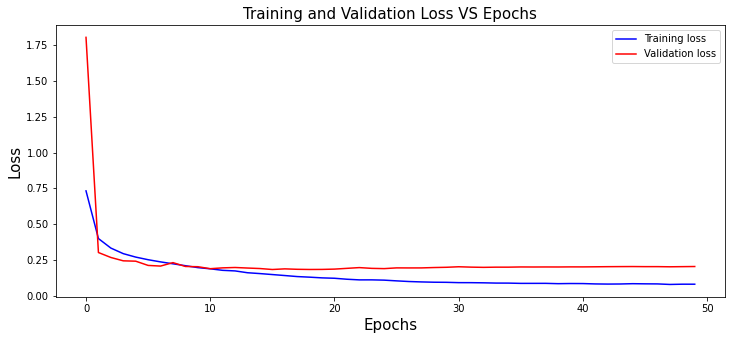

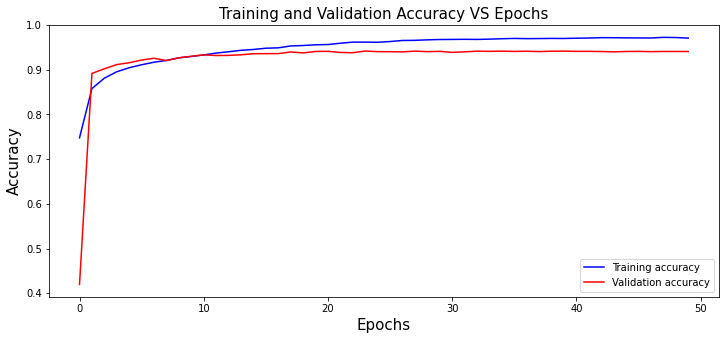

In [13]:
accuracy = model_fitting.history['accuracy']
val_accuracy = model_fitting.history['val_accuracy']

loss = model_fitting.history['loss']
val_loss = model_fitting.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()



## Generate predictions on test dataset

In [25]:
# Generate predictions 

predictions = cnn_model.predict(test_feat)

predictions = np.argmax(predictions, axis=1)

score = accuracy_score(test_lab, predictions)

print("\nThe accuracy of the trained CNN model is: ", score*100, "%")



The accuracy of the trained CNN model is:  94.39999999999999 %


# Convolutional AutoEncoder

## Parameters

In [0]:
inChannel = 1
a, b = 28, 28
input_img = Input(shape = (a, b, inChannel))
num_classes = 10

## Encoder & Decoder

In [0]:
def encoder(input_img):

    #encoder
    #input layer = 28 x 28 x 1 (wide and thin)

    # First CONV block
    conv1 = Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu')(input_img) #28 x 28 x 32
    bn1 = BatchNormalization()(conv1)
    conv1 = Conv2D(filters = 32, kernel_size=(3, 3), strides= 1, padding='same', 
                 data_format='channels_last', activation='relu')(bn1) #28 x 28 x 32
    bn1 = BatchNormalization()(conv1)
    pool1 = MaxPool2D(pool_size=(2, 2))(bn1) #14 x 14 x 32


    # Second CONV block
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(pool1) #14 x 14 x 64
    bn2 = BatchNormalization()(conv2)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn2) #14 x 14 x 64
    bn2 = BatchNormalization()(conv2)
    pool2 = MaxPool2D(pool_size=(2, 2))(bn2) #7 x 7 x 64
    drop1 = Dropout(0.25)(pool2)


    # Third CONV block
    conv3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(drop1) #7 x 7 x 128 (small and thick)
    bn3 = BatchNormalization()(conv3)
    conv3 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn3) #7 x 7 x 128 (small and thick)
    bn3 = BatchNormalization()(conv3)
    # pool3 = MaxPool2D(pool_size=(2, 2))(bn3)
    drop2 = Dropout(0.25)(bn3)

     

    return drop2

def decoder(encoded):    
    #decoder

    # First CONV block
    conv1 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(encoded) #7 x 7 x 128
    bn1 = BatchNormalization()(conv1)
    conv1 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn1) #7 x 7 x 128
    bn1 = BatchNormalization()(conv1)
    up1 = UpSampling2D((2,2))(bn1)

    # Second CONV block
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(up1)
    bn2 = BatchNormalization()(conv2)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, 
                 padding='same', data_format='channels_last')(bn2)
    bn2 = BatchNormalization()(conv2)
    up2 = UpSampling2D((2,2))(bn2) #14 x 14 x 64

    # Third CONV block
    conv3 = Conv2D(filters = 32, kernel_size=(3, 3), padding='same', 
                 data_format='channels_last', activation='relu')(up2)
    bn3 = BatchNormalization()(conv3)
    conv3 = Conv2D(filters = 32, kernel_size=(3, 3), padding='same', 
                 data_format='channels_last', activation='relu')(bn3)
    bn3 = BatchNormalization()(conv3)
    # up3 = UpSampling2D((2,2))(bn3) # 28 x 28 x 32
    
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(bn3) # 28 x 28 x 1

    return decoded

## Compile the model

In [31]:
autoencoder = Model(input_img, decoder(encoder(input_img)))

autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496 

## Train the model


In [32]:
batches = 128
epoch = 50


# Train autoencoder
autoencoder_train = autoencoder.fit(AE_x_train, g_train, batch_size= batches, epochs=epoch, verbose=1, validation_data=(AE_x_val, g_val))


Epoch 1/50
375/375 [==============================] - 9s 23ms/step - loss: 0.0222 - val_loss: 0.0283
Epoch 2/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 3/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0069 - val_loss: 0.0075
Epoch 4/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 5/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 6/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 7/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 8/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 9/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 10/50
375/375 [==============================] - 8s 22ms/step - loss: 0.0038 - val_lo

## Loss vs Epochs Plot

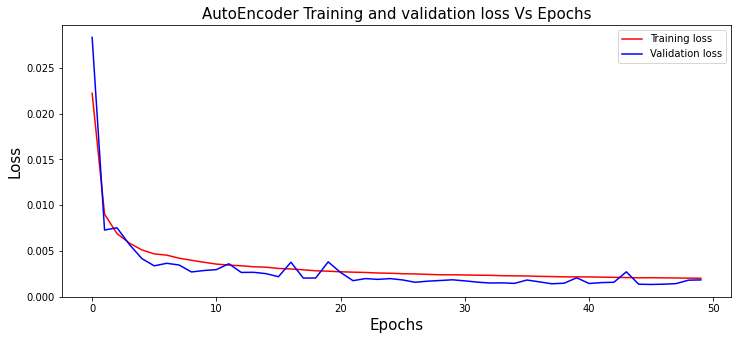

In [33]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize = (12,5))

plt.plot(epochs, loss, '-r', label='Training loss')
plt.plot(epochs, val_loss, '-b', label='Validation loss')
plt.xlabel('Epochs', fontsize= 15)
plt.ylabel('Loss', fontsize= 15)
plt.title('AutoEncoder Training and validation loss Vs Epochs', fontsize= 15)
plt.legend()
plt.show()

## Split the Train dataset again 



In [35]:
AE_x_train, AE_x_val, y_train, y_val = train_test_split(train_feat, train_lab, test_size = 0.2, random_state= 42)

print(AE_x_train.shape)
print(y_train.shape)
print(AE_x_val.shape)
print(y_val.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)


## Fully connected layer


In [0]:
def fullyconn(enco):
    flat = Flatten()(enco)                          # Flatten the input

    den1 = Dense(512, activation='relu')(flat)      # First dense layer
    bn1 = BatchNormalization()(den1)
    drop1 = Dropout(0.5)(bn1)

    den2 = Dense(64, activation='relu')(drop1)        # Second dense layer
    bn2 = BatchNormalization()(den2)
    drop2 = Dropout(0.5)(bn2)

    out = Dense(num_classes, activation='softmax')(drop2)     # Output layer
    return out

## Create the Convolutional Autoencoder using the Encoder and Fully Connected Layer

In [37]:
encode = encoder(input_img)
conv_ae = Model(input_img, fullyconn(encode))

conv_ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        1849

In [0]:
for l1,l2 in zip(conv_ae.layers[:17], autoencoder.layers[0:17]):
    l1.set_weights(l2.get_weights())

## Compile and Train the Convolutional Autoencoder

In [39]:
for layer in conv_ae.layers[0:17]:
    layer.trainable = False

# Optimizer
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )


conv_ae.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
conv_ae.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        1849

## Fit the model

In [40]:
batches = 128
epoch = 50

# Learning Rate Decay

lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


classify_train = conv_ae.fit(x_train, y_train, batch_size= batches, epochs= epoch, verbose=1, validation_data=(x_val, y_val))


Epoch 1/50
375/375 [==============================] - 3s 7ms/step - loss: 0.5649 - accuracy: 0.8168 - val_loss: 0.2953 - val_accuracy: 0.8930
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3703 - accuracy: 0.8748 - val_loss: 0.2697 - val_accuracy: 0.8986
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3213 - accuracy: 0.8896 - val_loss: 0.2526 - val_accuracy: 0.9107
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2942 - accuracy: 0.8977 - val_loss: 0.2518 - val_accuracy: 0.9099
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2734 - accuracy: 0.9038 - val_loss: 0.2378 - val_accuracy: 0.9127
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2559 - accuracy: 0.9106 - val_loss: 0.2433 - val_accuracy: 0.9128
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2459 - accuracy: 0.9128 - val_loss: 0.2384 - val_accuracy: 0.9163
Epoch 

## Plots

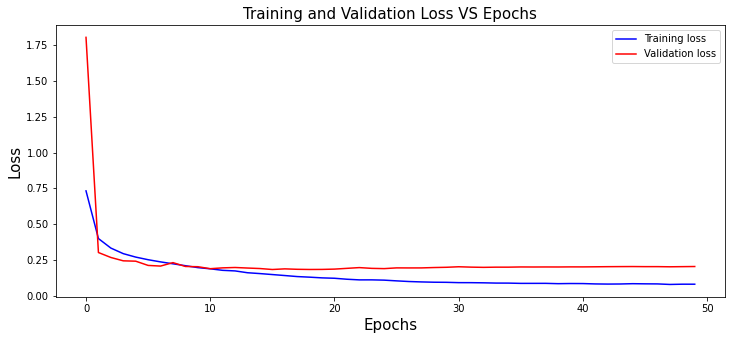

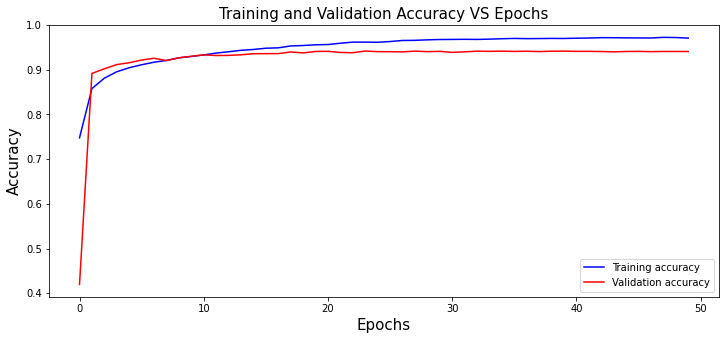

In [41]:
accuracy = model_fitting.history['accuracy']
val_accuracy = model_fitting.history['val_accuracy']

loss = model_fitting.history['loss']
val_loss = model_fitting.history['val_loss']

epochs = range(len(accuracy))

#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()


#########
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy VS Epochs', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()



## Generate predictions on test dataset

In [42]:
# Generate predictions 

predictions = conv_ae.predict(test_feat)

predictions = np.argmax(predictions, axis=1)

score = accuracy_score(test_lab, predictions)

print("\nThe accuracy of the Convolutional Autoencoder model is: ", score*100, "%")



The accuracy of the Convolutional Autoencoder model is:  92.54 %
